# CNN - MultiClass Classification - 10 clases - CNN -TF

- [10-classes-Dataset](https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip)

In [2]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [5]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Extraction

In [6]:
from zipfile import ZipFile

ext= ZipFile("../DATA/Computer_Vision/10_food_classes_all_data.zip")
ext.extractall("../DATA/Computer_Vision/")
ext.close()

In [54]:
from helper import get_class_names, plot_curves, traverse_dataset, view_random_image, pred_and_plot, load_prep_image


In [8]:
train_dir= "../DATA/Computer_Vision/10_food_classes_all_data/train/"
test_dir= "../DATA/Computer_Vision/10_food_classes_all_data/test/"

In [11]:
traverse_dataset("../DATA/Computer_Vision/10_food_classes_all_data/") 
# 750 train and 250 test files for 10 classes

 There are 0 files in 2 direcotory under ../DATA/Computer_Vision/10_food_classes_all_data/
 There are 0 files in 10 direcotory under ../DATA/Computer_Vision/10_food_classes_all_data/test
 There are 250 files in 0 direcotory under ../DATA/Computer_Vision/10_food_classes_all_data/test\chicken_curry
 There are 250 files in 0 direcotory under ../DATA/Computer_Vision/10_food_classes_all_data/test\chicken_wings
 There are 250 files in 0 direcotory under ../DATA/Computer_Vision/10_food_classes_all_data/test\fried_rice
 There are 250 files in 0 direcotory under ../DATA/Computer_Vision/10_food_classes_all_data/test\grilled_salmon
 There are 250 files in 0 direcotory under ../DATA/Computer_Vision/10_food_classes_all_data/test\hamburger
 There are 250 files in 0 direcotory under ../DATA/Computer_Vision/10_food_classes_all_data/test\ice_cream
 There are 250 files in 0 direcotory under ../DATA/Computer_Vision/10_food_classes_all_data/test\pizza
 There are 250 files in 0 direcotory under ../DATA/Com

In [13]:
classes= get_class_names(train_dir)
classes

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

shape -- (512, 512, 3)


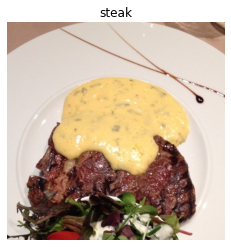

In [15]:
import random
img = view_random_image(train_dir, random.choice(classes))

## Preprocessing

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

traing_gen= ImageDataGenerator(rescale=1/255.,
                              rotation_range=20, 
                              width_shift_range=0.2, height_shift_range=0.2,
                              shear_range=0.2, zoom_range=0.2,
                              horizontal_flip=True, vertical_flip=True)

test_gen= ImageDataGenerator(rescale=1/255.)

In [17]:
train_data= traing_gen.flow_from_directory(train_dir, 
                                          target_size=(224,224), batch_size=32, 
                                          class_mode="categorical", seed=42,
                                          shuffle=True)

test_data= test_gen.flow_from_directory(test_dir, 
                                       target_size=(224,224), batch_size=32,
                                       class_mode="categorical", seed=42,
                                       shuffle=True)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## Model 1 : Tiny VGG

In [19]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [30]:
model_1= keras.Sequential([
            Conv2D(10,3,activation="relu", input_shape=(224,224,3)),
            Conv2D(10,3,activation="relu"),
            MaxPool2D(2,),
            
            Conv2D(10,3,activation="relu", input_shape=(224,224,3)),
            Conv2D(10,3,activation="relu"),
            MaxPool2D(2,),
            
            Flatten(),
            Dense(10, activation= "softmax")
        ], name="model-1")

model_1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model_1.fit(train_data, epochs=10, 
           steps_per_epoch=len(train_data),
           validation_data=test_data, validation_steps=len(test_data))


Epoch 1/10
235/235 [==============================] - 103s 433ms/step - loss: 2.2657 - accuracy: 0.1408 - val_loss: 2.0428 - val_accuracy: 0.2676
Epoch 2/10
235/235 [==============================] - 105s 445ms/step - loss: 2.1230 - accuracy: 0.2260 - val_loss: 1.9647 - val_accuracy: 0.3120
Epoch 3/10
235/235 [==============================] - 103s 439ms/step - loss: 2.0596 - accuracy: 0.2736 - val_loss: 1.8679 - val_accuracy: 0.3524
Epoch 4/10
235/235 [==============================] - 103s 437ms/step - loss: 2.0041 - accuracy: 0.2986 - val_loss: 1.8288 - val_accuracy: 0.3796
Epoch 5/10
235/235 [==============================] - 104s 441ms/step - loss: 1.9562 - accuracy: 0.3170 - val_loss: 1.8685 - val_accuracy: 0.3552
Epoch 6/10
235/235 [==============================] - 103s 439ms/step - loss: 1.9486 - accuracy: 0.3263 - val_loss: 1.7689 - val_accuracy: 0.3972
Epoch 7/10
235/235 [==============================] - 103s 438ms/step - loss: 1.9044 - accuracy: 0.3430 - val_loss: 1.7532 -

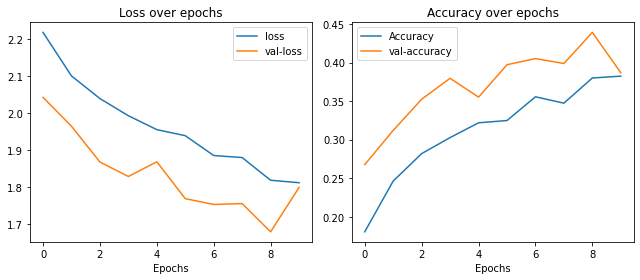

In [31]:
hist_1= model_1.history
plot_curves(hist_1)

## Model 2

In [25]:
model_2= keras.Sequential([
            Conv2D(10,3,activation="relu", input_shape=(224,224,3)),
            MaxPool2D(2,),       
            Conv2D(10,3,activation="relu"),
            MaxPool2D(2,),
            Dropout(0.15),
    
            Conv2D(16,3,activation="relu"),
            MaxPool2D(2,),
            Conv2D(16,3,activation="relu", input_shape=(224,224,3)),
            MaxPool2D(2,),
            Dropout(0.15),
    
            Conv2D(10,3,activation="relu"),
            MaxPool2D(2,),
            
            Flatten(),
            Dense(1000, activation="relu"),
            Dense(10, activation= "softmax")
        ], name="model-2")

model_2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

hist_2= model_2.fit(train_data, 
                   epochs=10, 
                   steps_per_epoch=len(train_data),
                   validation_data=test_data, validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 101s 427ms/step - loss: 2.2777 - accuracy: 0.1365 - val_loss: 2.1790 - val_accuracy: 0.2024
Epoch 2/10
235/235 [==============================] - 100s 424ms/step - loss: 2.1881 - accuracy: 0.1847 - val_loss: 2.1051 - val_accuracy: 0.2320
Epoch 3/10
235/235 [==============================] - 99s 423ms/step - loss: 2.1289 - accuracy: 0.2253 - val_loss: 2.0247 - val_accuracy: 0.2688
Epoch 4/10
235/235 [==============================] - 114s 487ms/step - loss: 2.0805 - accuracy: 0.2438 - val_loss: 2.0030 - val_accuracy: 0.2620
Epoch 5/10
235/235 [==============================] - 99s 423ms/step - loss: 2.0089 - accuracy: 0.2995 - val_loss: 1.8639 - val_accuracy: 0.3504
Epoch 6/10
235/235 [==============================] - 101s 432ms/step - loss: 1.9727 - accuracy: 0.2908 - val_loss: 1.8352 - val_accuracy: 0.3656
Epoch 7/10
235/235 [==============================] - 100s 426ms/step - loss: 1.9397 - accuracy: 0.3108 - val_loss: 1.8206 - v

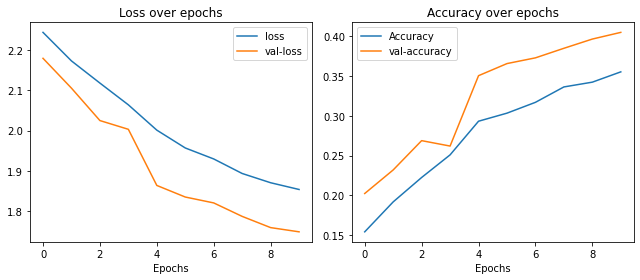

In [26]:
plot_curves(hist_2)

## Predicting with Custom Images

In [58]:
import random
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

def pred_and_plots(model,  file, classes) :
    """
    Predicting and plotting for an image
    """
    img= load_prep_image(file)
    
    if img.ndim < 4:
        plt.imshow(img)
        img= tf.expand_dims(img, axis=0) 
    else:
        plt.imshow(tf.squeeze(img, axis=0))

    pred= tf.squeeze(model.predict(img))
    
    if len(pred) ==1 :
        pred_Class= classes[tf.cast(pred.numpy() > 0.5 , dtype="int8").numpy()]
    else :
        pred_Class= classes[tf.math.argmax(pred.numpy())]
    
    plt.title(pred_Class, fontdict={"fontsize": 18, "color": "green"})
    plt.axis(False)

03-hamburger.jpeg
03-pizza-dad.jpeg
03-steak.jpeg
03-sushi.jpeg


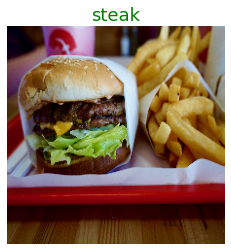

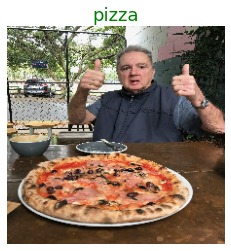

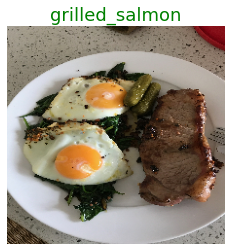

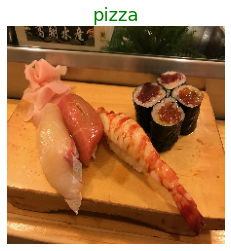

In [63]:
import pathlib

pathx= "../DATA/Computer_Vision/"
dir= pathlib.Path(pathx)

for item in dir.glob("*.jpeg"):
    print(item.name)
    plt.figure()
    pred_and_plots(model_2, str(item), classes)

> Not That accurate -- only 40% accuracy.. we can add Transfer Learning to have a higher accuracy.
